In [22]:
import numpy as np
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.utils import to_categorical




Loading test images...
Total test images loaded: 34799
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step


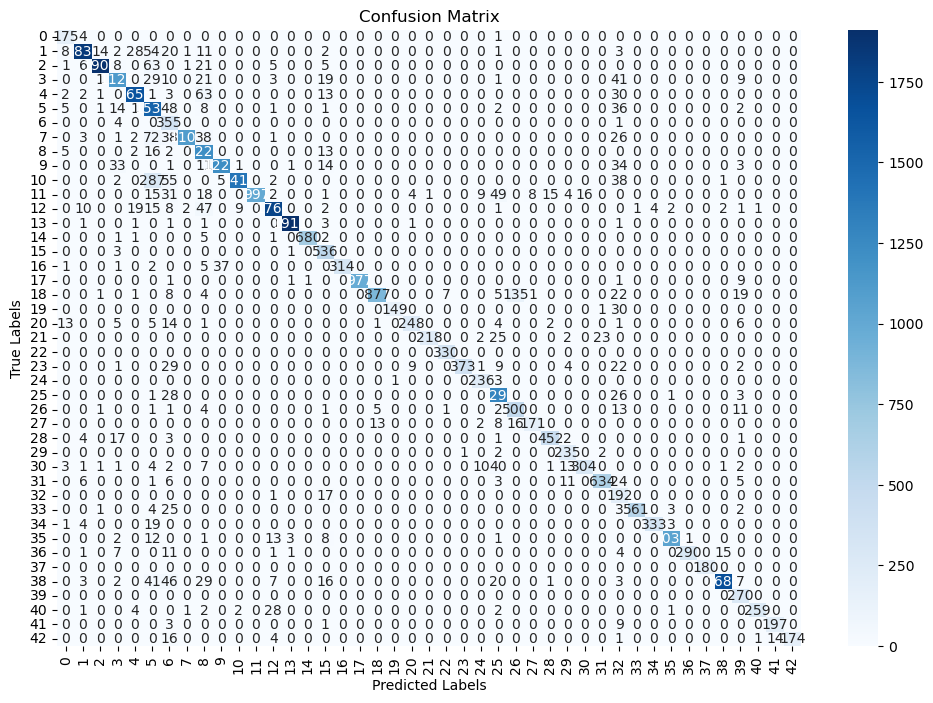

In [23]:
model = tf.keras.models.load_model("Traffic_Sign_Model.h5")


folder_path = "trafficSignData"  
image_dimensions = (32, 32)  
num_classes = 43  
X_test = []
y_test = []

print("Loading test images...")

# Loop through all class folders
for class_id in range(num_classes):  
    class_folder = os.path.join(folder_path, str(class_id))  
    if os.path.exists(class_folder):  
        for img_name in os.listdir(class_folder): 
            img_path = os.path.join(class_folder, img_name)
            img = cv2.imread(img_path) 
            if img is not None:
                img = cv2.resize(img, image_dimensions) 
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
                img = img / 255.0 
                X_test.append(img)
                y_test.append(class_id)
            else:
                print(f"Failed to load image: {img_path}")
    else:
        print(f"Warning: Class folder {class_folder} not found!")

# Convert lists to NumPy arrays
X_test = np.array(X_test).reshape(-1, 32, 32, 1)  
y_test = np.array(y_test)

print(f"Total test images loaded: {X_test.shape[0]}")

y_pred_probs = model.predict(X_test)  # Get probability scores
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(num_classes), yticklabels=range(num_classes))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()




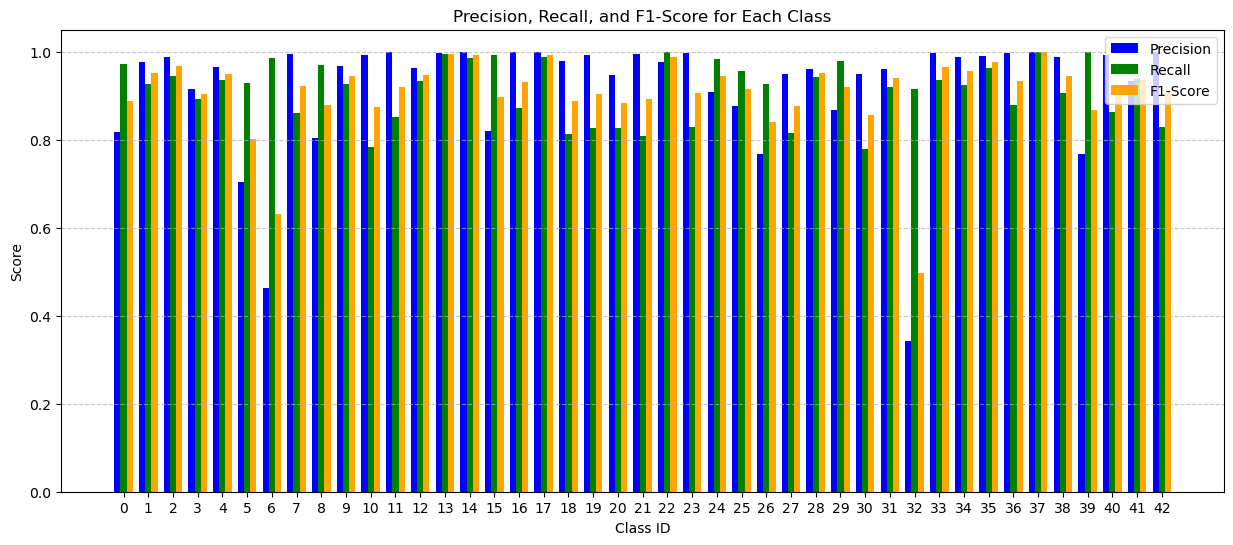


Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.97      0.89       180
           1       0.98      0.93      0.95      1980
           2       0.99      0.95      0.97      2010
           3       0.92      0.89      0.90      1260
           4       0.97      0.94      0.95      1770
           5       0.70      0.93      0.80      1650
           6       0.46      0.99      0.63       360
           7       1.00      0.86      0.92      1290
           8       0.80      0.97      0.88      1260
           9       0.97      0.93      0.95      1320
          10       0.99      0.78      0.88      1800
          11       1.00      0.85      0.92      1170
          12       0.96      0.93      0.95      1890
          13       1.00      1.00      1.00      1920
          14       1.00      0.99      0.99       690
          15       0.82      0.99      0.90       540
          16       1.00      0.87      0.93       360
  

In [24]:
# Generate classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Extract precision, recall, and F1-score for each class
precision = [report[str(i)]["precision"] for i in range(num_classes)]
recall = [report[str(i)]["recall"] for i in range(num_classes)]
f1_score = [report[str(i)]["f1-score"] for i in range(num_classes)]

# Plot bar chart for precision, recall, and F1-score
x = np.arange(num_classes)  # Class labels
width = 0.25  # Width of the bars

plt.figure(figsize=(15, 6))
plt.bar(x - width, precision, width, label="Precision", color="blue")
plt.bar(x, recall, width, label="Recall", color="green")
plt.bar(x + width, f1_score, width, label="F1-Score", color="orange")

plt.xlabel("Class ID")
plt.ylabel("Score")
plt.title("Precision, Recall, and F1-Score for Each Class")
plt.xticks(x, range(num_classes))
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Print classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

In [25]:
# Extract weighted averages from the report
weighted_precision = report['weighted avg']['precision']
weighted_recall = report['weighted avg']['recall']
weighted_f1_score = report['weighted avg']['f1-score']

# Print the weighted averages
print("\nWeighted Average Metrics:")
print("Metric        Value")
print("-" * 25)
print(f"Precision   {weighted_precision}")
print(f"Recall      {weighted_recall}")
print(f"F1-Score    {weighted_f1_score}")


Weighted Average Metrics:
Metric        Value
-------------------------
Precision   0.9377869109943155
Recall      0.9172677375786661
F1-Score    0.9222180940471219


Loading test images...
Total test images loaded: 34799
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step


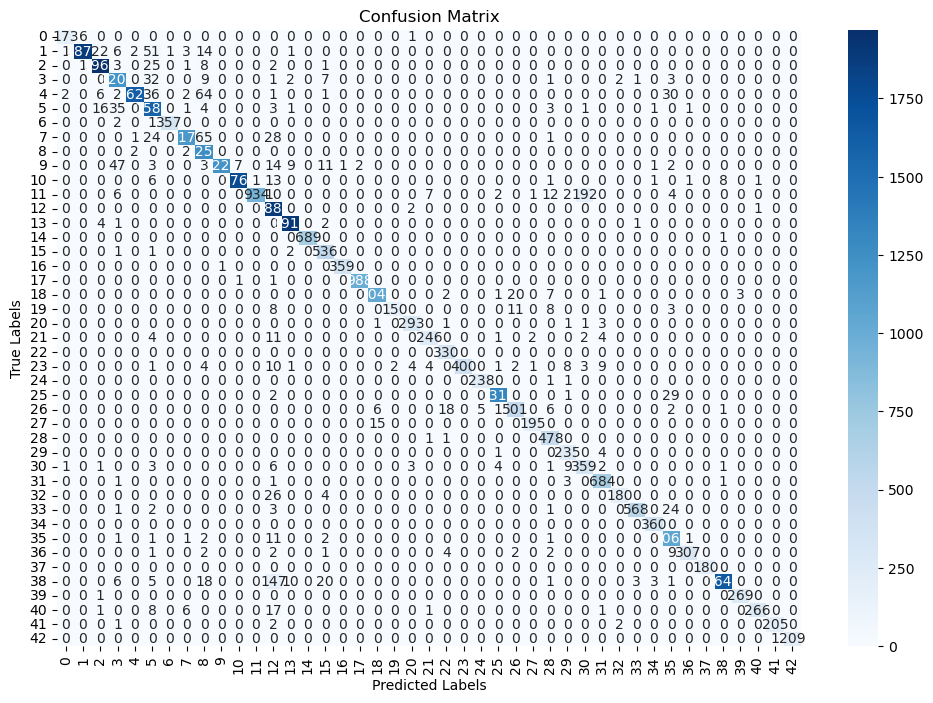

In [27]:
model = tf.keras.models.load_model("Traffic_Sign_Model_old.h5")


folder_path = "trafficSignData"  
image_dimensions = (32, 32)  
num_classes = 43  
X_test = []
y_test = []

print("Loading test images...")

# Loop through all class folders
for class_id in range(num_classes):  
    class_folder = os.path.join(folder_path, str(class_id))  
    if os.path.exists(class_folder):  
        for img_name in os.listdir(class_folder): 
            img_path = os.path.join(class_folder, img_name)
            img = cv2.imread(img_path) 
            if img is not None:
                img = cv2.resize(img, image_dimensions) 
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
                img = img / 255.0 
                X_test.append(img)
                y_test.append(class_id)
            else:
                print(f"Failed to load image: {img_path}")
    else:
        print(f"Warning: Class folder {class_folder} not found!")

# Convert lists to NumPy arrays
X_test = np.array(X_test).reshape(-1, 32, 32, 1)  
y_test = np.array(y_test)

print(f"Total test images loaded: {X_test.shape[0]}")

y_pred_probs = model.predict(X_test)  # Get probability scores
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(num_classes), yticklabels=range(num_classes))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()




In [28]:


# Print classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       180
           1       1.00      0.95      0.97      1980
           2       0.97      0.98      0.98      2010
           3       0.91      0.95      0.93      1260
           4       1.00      0.92      0.96      1770
           5       0.89      0.96      0.92      1650
           6       1.00      0.99      0.99       360
           7       0.99      0.91      0.95      1290
           8       0.87      1.00      0.93      1260
           9       1.00      0.92      0.96      1320
          10       1.00      0.98      0.99      1800
          11       1.00      0.80      0.89      1170
          12       0.86      1.00      0.92      1890
          13       0.99      1.00      0.99      1920
          14       1.00      1.00      1.00       690
          15       0.92      0.99      0.95       540
          16       1.00      1.00      1.00       360
  

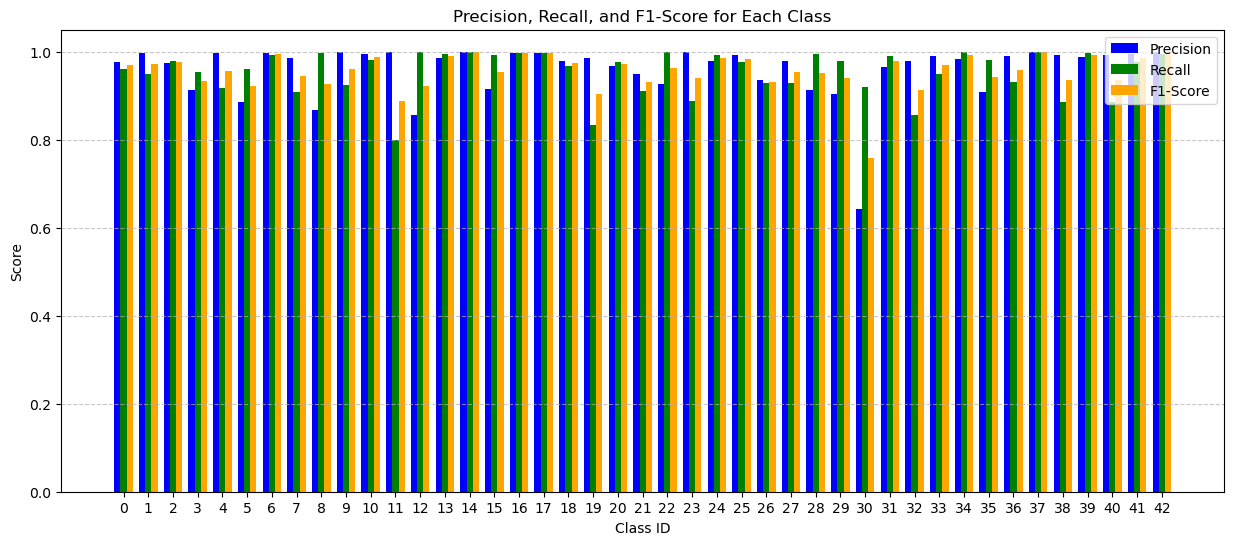

In [31]:
# Generate classification report
report1 = classification_report(y_test, y_pred, output_dict=True)

# Extract precision, recall, and F1-score for each class
precision = [report1[str(i)]["precision"] for i in range(num_classes)]
recall = [report1[str(i)]["recall"] for i in range(num_classes)]
f1_score = [report1[str(i)]["f1-score"] for i in range(num_classes)]

# Plot bar chart for precision, recall, and F1-score
x = np.arange(num_classes)  # Class labels
width = 0.25  # Width of the bars

plt.figure(figsize=(15, 6))
plt.bar(x - width, precision, width, label="Precision", color="blue")
plt.bar(x, recall, width, label="Recall", color="green")
plt.bar(x + width, f1_score, width, label="F1-Score", color="orange")

plt.xlabel("Class ID")
plt.ylabel("Score")
plt.title("Precision, Recall, and F1-Score for Each Class")
plt.xticks(x, range(num_classes))
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [30]:
# Extract weighted averages from the report
weighted_precision = report1['weighted avg']['precision']
weighted_recall = report1['weighted avg']['recall']
weighted_f1_score = report1['weighted avg']['f1-score']

# Print the weighted averages
print("\nWeighted Average Metrics:")
print("Metric        Value")
print("-" * 25)
print(f"Precision   {weighted_precision}")
print(f"Recall      {weighted_recall}")
print(f"F1-Score    {weighted_f1_score}")


Weighted Average Metrics:
Metric        Value
-------------------------
Precision   0.9597362968821525
Recall      0.9549987068593925
F1-Score    0.9554910597852132


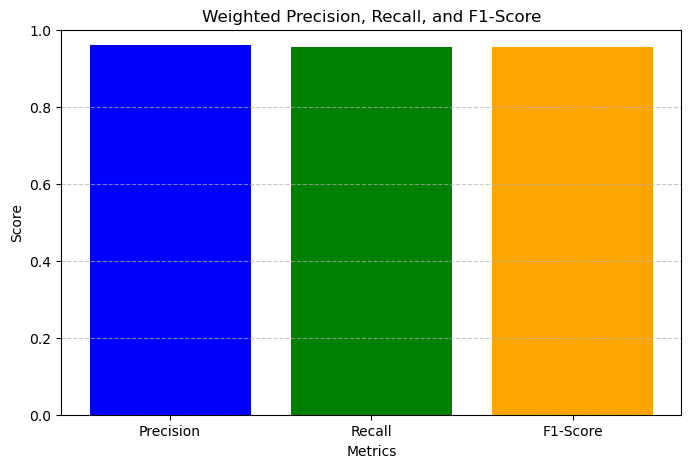

In [33]:
# Data for bar chart
metrics = ["Precision", "Recall", "F1-Score"]
values = [weighted_precision, weighted_recall, weighted_f1_score]

# Plot bar chart
plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color=["blue", "green", "orange"])

plt.xlabel("Metrics")
plt.ylabel("Score")
plt.title("Weighted Precision, Recall, and F1-Score")
plt.ylim(0, 1)  # Score range from 0 to 1
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()